In [2]:
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf

Using TensorFlow backend.


# Helper Functions

## 1. LogLogPlotter

In [3]:
from scipy import stats
import matplotlib.pyplot as plt

'''
Function that takes in two dataframe columns and plots a log-log graph
Follows standardised formatting
@input recorded: dataframe column of recorded data
@input predicted: dataframe column of the predicted value
@input xmin: lower bound of graph's x axis
@input xmax: upper bound of graph's x axis
@input ymin: lower bound of graph's y axis
@input ymax: upper bound of graph's y axis
@input xTitle: title for x axis
@input yTitle: title for y axis
@output log log graph of the preducted values against recorded values
'''

def logLogPlotter(recorded, predicted, xmin, xmax, ymin, ymax, xTitle, yTitle):
    x = recorded
    y = predicted

    coefficients = np.polyfit(np.log(x), np.log(y), 1)
    line_function = np.poly1d(coefficients)

    # Create a range for predicted values for the fit line
    x_vals = np.linspace(min(x), max(y), 400)
    y_vals = np.exp(line_function(np.log(x_vals)))

    #calculate similarity measures
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    #best fit line and y = x line
    plt.scatter(x, y, c='red', marker='x')
    plt.plot(x_vals, y_vals, color='red', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
    plt.axline((0, 0), (1,1),color='black',linestyle='--', label=f'y=x, R^2 = {r_value ** 2}',)

    #visuals
    font_family = 'Times New Roman'
    title_font_size=17
    label_font_size=15
    legend_tick_font_size=12

    plt.title(f'Predicted {yTitle} against Recorded {xTitle}', fontsize=title_font_size, fontfamily=font_family)
    plt.xlabel(f'Recorded {xTitle}', fontsize=label_font_size, fontfamily=font_family)
    plt.ylabel(f'Predicted {yTitle}', fontsize=label_font_size, fontfamily=font_family)

    plt.legend(fontsize = legend_tick_font_size)
    plt.loglog()
    plt.xlim(xmax=xmax, xmin=xmin)
    plt.ylim(ymax=ymax, ymin=ymin)

    plt.show()

## 2. Surface Plotter

In [4]:

def surfacePlotter(model, data_input):
    test = []
    numeriter=100
    outpt1=np.zeros((numeriter,numeriter))
    outpt2=np.zeros((numeriter,numeriter))
    predictions = model.predict(data_inputs)
    #first point (row [0])comparison of data and prediction


    
    # display(a)
    outpt1=outpt1*almed #check
    outpt2=outpt2*efmed
    # display(outpt1)
    font_family = 'Times New Roman'
    title_font_size=17
    label_font_size=15
    legend_tick_font_size=12
    #SETTING UP PLOT

    #Surface Plot
    from matplotlib import cm
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(T, Qs_dot, outpt1,cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)


    fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.1)
    plt.xlabel("Temperature [K]", fontsize=label_font_size, fontfamily=font_family)
    plt.ylabel("Qs dot [W/m^2 s]", fontsize=label_font_size, fontfamily=font_family)
    ax.set_zlabel('alpha', fontsize=label_font_size, fontfamily=font_family)
    plt.title('Surface plot of Air to Fuel ratio against Qs dot and T', fontsize=title_font_size, fontfamily=font_family)
    plt.show()


# Data

In [5]:
data = pd.read_csv('../data/task1.1data.csv')
data[:5]

,air_temp,load_resistance,i_d,output_voltage,power_output
0,-10.0,350.0,4.464,18.9,80.3
1,-10.0,650.0,4.464,23.5,124.6
2,-10.0,950.0,4.464,24.8,138.6
3,-10.0,1250.0,4.464,25.6,146.9
4,10.0,350.0,4.464,19.2,83.1


## (a)

### Determining data median

In [6]:
median = data.median()
median

air_temp            10.000
load_resistance    800.000
i_d                  6.696
output_voltage      26.450
power_output       100.100
dtype: float64

### Normalising by median

In [7]:
norm_data = data.divide(median)
norm_data[:5]

,air_temp,load_resistance,i_d,output_voltage,power_output
0,-1.0,0.4375,0.666667,0.714556,0.802198
1,-1.0,0.8125,0.666667,0.888469,1.244755
2,-1.0,1.1875,0.666667,0.937618,1.384615
3,-1.0,1.5625,0.666667,0.967864,1.467532
4,1.0,0.4375,0.666667,0.725898,0.830170


In [8]:
mean_values = norm_data.mean()
mean_values

air_temp           1.000000
load_resistance    1.000000
i_d                1.000000
output_voltage     0.985297
power_output       1.088217
dtype: float64

In [9]:
air_temp_mean = mean_values[0]
load_resistance_mean = mean_values[1]
i_d_mean = mean_values[2]
output_voltage_mean = mean_values[3]
power_output_mean = mean_values[4]

## (b)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = norm_data[['air_temp', 'load_resistance', 'i_d']]
y = norm_data[['output_voltage', 'power_output']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


## (c) 

In [12]:
'''>>>>> start CodeP3.1.2F23
    V.P. Carey ME249, Fall 2023

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# define meadian values of input variables - add your values here
Tamed = air_temp_mean  #make sure Tamed does not = 0
IDmed = i_d_mean
RLmed = load_resistance_mean

#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
xdata = X_train
xarray= np.array(xdata)
# print (xdata)
# print (xarray)

# define meadian values of output variables - add your values here
VLmed = output_voltage_mean
Wdmed = power_output_mean

#create output data array
ydata = y_train
yarray= np.array(ydata)
# print (ydata)
# print (yarray)

In [13]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.5, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(12, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(6, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


2023-11-22 20:00:40.060047: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 20:00:40.061815: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [14]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.010)
model.compile(loss='mean_absolute_error',optimizer=rms)


## (d)

In [15]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=800,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)

print('smallest loss =', np.min(loss_hist))

model.save('best_model.h5')

Epoch 1/800
24/24 [==============================] - 0s 16ms/step - loss: 0.8553
Epoch 2/800
24/24 [==============================] - 0s 59us/step - loss: 0.5419
Epoch 3/800
24/24 [==============================] - 0s 64us/step - loss: 0.3332
Epoch 4/800
24/24 [==============================] - 0s 58us/step - loss: 0.2959
Epoch 5/800
24/24 [==============================] - 0s 78us/step - loss: 0.2394
Epoch 6/800
24/24 [==============================] - 0s 64us/step - loss: 0.2639
Epoch 7/800
24/24 [==============================] - 0s 75us/step - loss: 0.2321
Epoch 8/800
24/24 [==============================] - 0s 69us/step - loss: 0.2506
Epoch 9/800
24/24 [==============================] - 0s 68us/step - loss: 0.2150
Epoch 10/800
24/24 [==============================] - 0s 60us/step - loss: 0.2416
Epoch 11/800
24/24 [==============================] - 0s 57us/step - loss: 0.1923
Epoch 12/800
24/24 [==============================] - 0s 54us/step - loss: 0.2353
Epoch 13/800
24/24 [=====

### This line doesn't work for me - shawn

In [16]:


# This line of code can be used to reconstruct the saved model.

# recon_model = keras.models.load_model("best_model.h5")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.








## (e)

In [17]:
y_predictions = model.predict(X_train[['air_temp', 'load_resistance', 'i_d']])
y_predictions_df = pd.DataFrame(y_predictions, columns=['output_voltage', 'power_output'])
y_predictions_df


,output_voltage,power_output
0,0.694533,0.795730
1,0.780885,0.937995
2,1.004286,0.783164
3,0.976598,1.033977
4,1.052002,1.173473
5,0.893654,1.234628
6,1.057802,1.752579
7,0.806580,1.076617
8,0.851417,0.571088
9,0.875491,1.286464


In [18]:
y_recorded_df = y_train[['output_voltage', 'power_output']]
y_recorded_df


,output_voltage,power_output
0,0.714556,0.802198
4,0.725898,0.830170
29,1.024575,0.826174
15,0.998110,1.044955
19,1.069943,1.194805
5,0.945180,1.403596
11,1.096408,1.892108
1,0.888469,1.244755
24,0.888469,0.621379
2,0.937618,1.384615


### (i) Mean Absolute Error

In [19]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['power_output'], y_predictions_df['power_output'])
print(f'MAE: {mae}')

MAE: 0.07621145228812827


### (ii) log-log plot

#### Training set: Predicted vs Recorded


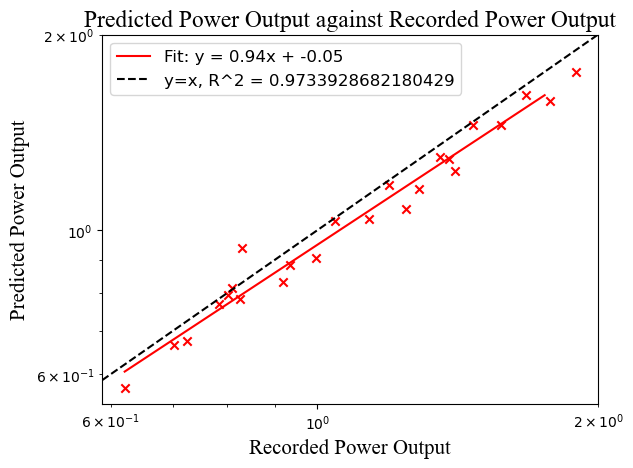

In [20]:
logLogPlotter(y_recorded_df['power_output'], y_predictions_df['power_output'], -0.5, 2, -0.5, 2, 'Power Output', 'Power Output')

## (f)

#### Validation Set: Predicted vs Recorded

In [21]:
y_predictions = model.predict(X_test[['air_temp', 'load_resistance', 'i_d']])
y_predictions_df = pd.DataFrame(y_predictions, columns=['output_voltage', 'power_output'])
y_predictions_df

,output_voltage,power_output
0,1.144834,1.033080
1,0.880329,0.766038
2,0.975708,0.749813
3,1.054211,0.865562
4,0.860781,0.716143
5,1.084987,0.929619
6,1.027620,1.007186
7,0.783465,0.600921
8,0.861091,1.060705
9,0.963444,0.895288


In [22]:
y_recorded_df = y_test[['output_voltage', 'power_output']]
y_recorded_df

,output_voltage,power_output
35,1.156900,1.050949
13,0.937618,0.921079
26,0.994329,0.775225
30,1.062382,0.886114
16,0.892250,0.836164
31,1.085066,0.927073
21,1.062382,1.180819
12,0.846881,0.751249
8,0.733459,0.846154
17,1.001890,1.047952


### (i) Mean Absolute Error

In [23]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['power_output'], y_predictions_df['power_output'])
print(f'MAE: {mae}')

MAE: 0.10650905005105375


### (ii) log-log plot

#### Validation set: Predicted vs Recorded


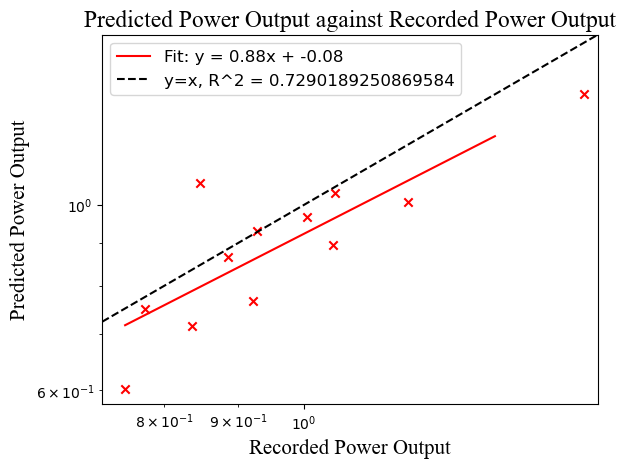

In [24]:
logLogPlotter(y_recorded_df['power_output'], y_predictions_df['power_output'], -0.5, 1.6, -0.5, 1.6, 'Power Output', 'Power Output')

# (g)

### Import data for ID > 1300 W/m^2

In [25]:
data = pd.read_csv('../data/task1.2_g_data.csv')
data[:5]

,air_temp,load_resistance,i_d,output_voltage,power_output
0,-10.0,1550.0,4.464,26.1,152.8
1,-10.0,1850.0,4.464,26.5,172.7
2,10.0,1550.0,4.464,27.9,191.4
3,10.0,1850.0,4.464,28.3,198.0
4,30.0,1550.0,4.464,29.6,217.8


### Determining data median

In [26]:
median = data.median()
median

air_temp             10.000
load_resistance    1700.000
i_d                   6.696
output_voltage       28.950
power_output        138.000
dtype: float64

### Normalising by median

In [27]:
norm_data = data.divide(median)
norm_data[:5]

,air_temp,load_resistance,i_d,output_voltage,power_output
0,-1.0,0.911765,0.666667,0.901554,1.107246
1,-1.0,1.088235,0.666667,0.915371,1.251449
2,1.0,0.911765,0.666667,0.963731,1.386957
3,1.0,1.088235,0.666667,0.977547,1.434783
4,3.0,0.911765,0.666667,1.022453,1.578261


In [28]:
X_data = norm_data[['air_temp', 'load_resistance', 'i_d']]
y_data = norm_data[['output_voltage', 'power_output']]

### Predicted values of new dataset using trained model

In [29]:
y_predictions = model.predict(X_data)
y_predictions_df = pd.DataFrame(y_predictions, columns=['output_voltage', 'power_output'])
y_predictions_df

,output_voltage,power_output
0,0.828022,1.138268
1,0.860112,1.236527
2,0.913650,1.297718
3,0.942847,1.398050
4,0.984723,1.422757
5,1.011510,1.527674
6,0.898771,0.804139
7,0.926599,0.869474
8,0.981915,0.935839
9,1.008262,1.002941


In [30]:
y_recorded_df = y_data
y_recorded_df

,output_voltage,power_output
0,0.901554,1.107246
1,0.915371,1.251449
2,0.963731,1.386957
3,0.977547,1.434783
4,1.022453,1.578261
5,1.039724,1.626087
6,0.929188,0.860870
7,0.939551,0.884783
8,0.994819,0.988406
9,1.005181,1.011594


### (i) Mean Absolute Error

In [31]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['power_output'], y_predictions_df['power_output'])
print(f'MAE: {mae}')

MAE: 0.051734935133545476


### (ii) log-log plot

#### Predicted vs Recorded


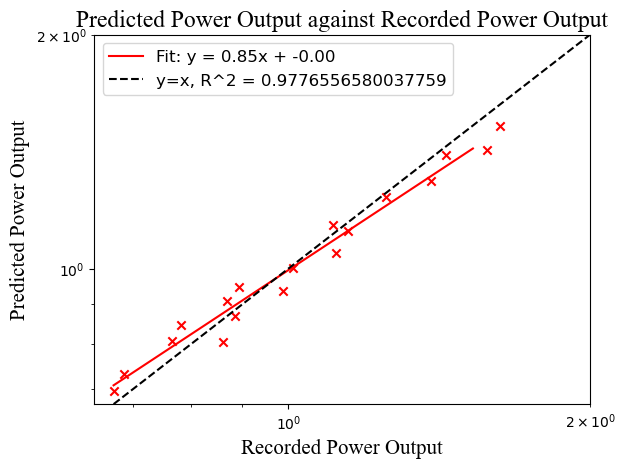

In [32]:
logLogPlotter(y_recorded_df['power_output'], y_predictions_df['power_output'], -0.5, 2, -0.5, 2, 'Power Output', 'Power Output')

# (h)

In [33]:
test = [[10,35,0.5]]
res = model.predict(np.array(test))
res[0,1]

4.104272

## @TODO: Fix plot

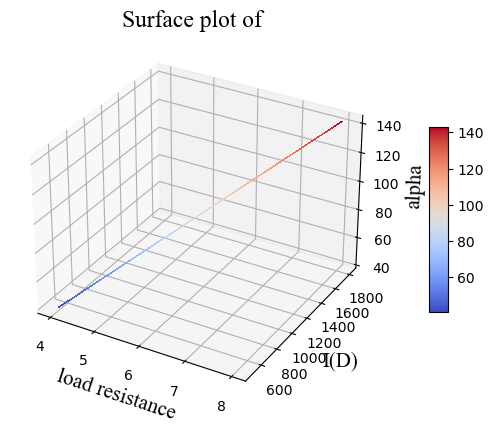

In [35]:
test = []
numeriter=100
outpt1=np.zeros((numeriter,numeriter))
outpt2=np.zeros((numeriter,numeriter))

#normalized
RL=np.linspace(4,8,numeriter)
RLnorm=RL/load_resistance_mean
ID=np.linspace(500,1800,numeriter)
IDnorm=ID/i_d_mean
res=[]
for i in range(len(RL)):
    for j in range(len(ID)):
        test = [[20/air_temp_mean, RLnorm[i], IDnorm[j]]]
        testarray = np.array(test)
        a = model.predict(testarray)
        outpt1[i,j] = a[0,0]
        outpt2[i,j] = a[0,1]
        
  
# display(a)
outpt1=outpt1*output_voltage_mean #check
outpt2=outpt2*power_output_mean
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12
#SETTING UP PLOT

#Surface Plot
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(RL, ID, outpt2,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.1)
plt.xlabel("load resistance", fontsize=label_font_size, fontfamily=font_family)
plt.ylabel("I(D)", fontsize=label_font_size, fontfamily=font_family)
ax.set_zlabel('alpha', fontsize=label_font_size, fontfamily=font_family)
plt.title('Surface plot of ', fontsize=title_font_size, fontfamily=font_family)
plt.show()

# outpt1_df = pd.DataFrame(outpt1)
# display(outpt1_df)